In [1]:
import numpy as np

In [2]:
import objective

In [3]:
import utilisation

In [4]:
raw_travel_times = np.genfromtxt("./test_data/travel_times_matrix.csv", delimiter=",")
beta = objective.get_beta(travel_times=raw_travel_times)
primary_vehicle_travel_times = raw_travel_times / 0.75
secondary_vehicle_travel_times = raw_travel_times / 1.215

R = objective.get_R(
    primary_vehicle_travel_times=primary_vehicle_travel_times,
    secondary_vehicle_travel_times=secondary_vehicle_travel_times,
)
survival_functions = (
    lambda t: 1 / (1 + np.exp(0.26 + 0.139 * t)),
    lambda t: np.heaviside(15 - t, 1),
    lambda t: np.heaviside(60 - t, 1),
)
demand_rates_13 = np.genfromtxt("../data/demand_13.csv", delimiter=",") / 1440
demand_rates_19 = np.genfromtxt("../data/demand_19.csv", delimiter=",") / 1440
demand_rates_34 = np.genfromtxt("../data/demand_34.csv", delimiter=",") / 1440
demand_rates_45 = np.genfromtxt("../data/demand_45.csv", delimiter=",") / 1440
demand_rates = {
    13: demand_rates_13,
    19: demand_rates_19,
    34: demand_rates_34,
    45: demand_rates_45
}

vehicle_locations, pickup_locations = tuple(map(range, raw_travel_times.shape))

weights_single_vehicle = np.array([0, 0, 1])
weights_multiple_vehicles = np.array([1, 1, 0])

primary_survivals, secondary_survivals = objective.get_survival_time_vectors(
    survival_functions, primary_vehicle_travel_times, secondary_vehicle_travel_times
)

service_rate_primary = 1 / (3.885893339206694 * 60)
service_rate_secondary = 1 / (1.0382054942769607 * 60)

In [5]:
raw_travel_times_3k = np.genfromtxt('../../ambulance_simulation/src/data/posts/grid_3km/neighbourhood_to_amb.csv', delimiter=',').T
raw_travel_times_5k = np.genfromtxt('../../ambulance_simulation/src/data/posts/grid_5km/neighbourhood_to_amb.csv', delimiter=',').T

beta_3k = objective.get_beta(travel_times=raw_travel_times_3k)
primary_vehicle_travel_times_3k = raw_travel_times_3k / 0.75
secondary_vehicle_travel_times_3k = raw_travel_times_3k / 1.215

R_3k = objective.get_R(
    primary_vehicle_travel_times=primary_vehicle_travel_times_3k,
    secondary_vehicle_travel_times=secondary_vehicle_travel_times_3k,
)

beta_5k = objective.get_beta(travel_times=raw_travel_times_5k)
primary_vehicle_travel_times_5k = raw_travel_times_5k / 0.75
secondary_vehicle_travel_times_5k = raw_travel_times_5k / 1.215

R_5k = objective.get_R(
    primary_vehicle_travel_times=primary_vehicle_travel_times_5k,
    secondary_vehicle_travel_times=secondary_vehicle_travel_times_5k,
)

vehicle_locations_3k, pickup_locations_3k = tuple(map(range, raw_travel_times_3k.shape))
vehicle_locations_5k, pickup_locations_5k = tuple(map(range, raw_travel_times_5k.shape))

primary_survivals_3k, secondary_survivals_3k = objective.get_survival_time_vectors(
    survival_functions, primary_vehicle_travel_times_3k, secondary_vehicle_travel_times_3k
)

primary_survivals_5k, secondary_survivals_5k = objective.get_survival_time_vectors(
    survival_functions, primary_vehicle_travel_times_5k, secondary_vehicle_travel_times_5k
)


In [6]:
current_primary = np.genfromtxt('../../ambulance_simulation/src/data/posts/original/allocations/current.csv')
current_secondary = np.genfromtxt('../../ambulance_simulation/src/data/posts/original/allocations_secondary/current.csv')

In [7]:
optimised_13_primary = np.genfromtxt('../../ambulance_simulation/src/data/posts/original/allocations/demand_13_current_current.csv')
optimised_13_secondary = np.genfromtxt('../../ambulance_simulation/src/data/posts/original/allocations_secondary/demand_13_current_current.csv')

optimised_19_primary = np.genfromtxt('../../ambulance_simulation/src/data/posts/original/allocations/demand_19_current_current.csv')
optimised_19_secondary = np.genfromtxt('../../ambulance_simulation/src/data/posts/original/allocations_secondary/demand_19_current_current.csv')

optimised_34_primary = np.genfromtxt('../../ambulance_simulation/src/data/posts/original/allocations/demand_34_current_current.csv')
optimised_34_secondary = np.genfromtxt('../../ambulance_simulation/src/data/posts/original/allocations_secondary/demand_34_current_current.csv')

optimised_45_primary = np.genfromtxt('../../ambulance_simulation/src/data/posts/original/allocations/demand_45_current_current.csv')
optimised_45_secondary = np.genfromtxt('../../ambulance_simulation/src/data/posts/original/allocations_secondary/demand_45_current_current.csv')

In [8]:
def get_obj(allocation_primary, allocation_secondary, demand_rates):
    g = objective.get_objective(
        demand_rates=demand_rates,
        primary_survivals=primary_survivals,
        secondary_survivals=secondary_survivals,
        weights_single_vehicle=weights_single_vehicle,
        weights_multiple_vehicles=weights_multiple_vehicles,
        beta=beta,
        R=R,
        vehicle_station_utilisation_function=utilisation.solve_utilisations,
        allocation_primary=allocation_primary,
        allocation_secondary=allocation_secondary,
        service_rate_primary=service_rate_primary,
        service_rate_secondary=service_rate_secondary,
    )
    return (g / demand_rates.sum()) * 100

In [9]:
def get_A1(allocation_primary, allocation_secondary, demand_rates):
    g = objective.get_survival_A1_only(
        demand_rates=demand_rates,
        primary_survivals=primary_survivals,
        secondary_survivals=secondary_survivals,
        weights_single_vehicle=weights_single_vehicle,
        weights_multiple_vehicles=weights_multiple_vehicles,
        beta=beta,
        R=R,
        vehicle_station_utilisation_function=utilisation.solve_utilisations,
        allocation_primary=allocation_primary,
        allocation_secondary=allocation_secondary,
        service_rate_primary=service_rate_primary,
        service_rate_secondary=service_rate_secondary,
    )
    return (g / demand_rates[0].sum()) * 100

In [10]:
get_obj(current_primary, current_secondary, demand_rates_13)

98.33982107757853

In [11]:
get_obj(current_primary, current_secondary, demand_rates_13), get_A1(current_primary, current_secondary, demand_rates_13)

(98.33982107757853, 26.054669969446113)

In [12]:
get_obj(current_primary, current_secondary, demand_rates_19), get_A1(current_primary, current_secondary, demand_rates_19)

(97.74334805320086, 25.16685603350719)

In [13]:
get_obj(current_primary, current_secondary, demand_rates_34), get_A1(current_primary, current_secondary, demand_rates_34)

(95.78141842783452, 22.751236798914928)

In [14]:
get_obj(current_primary, current_secondary, demand_rates_45), get_A1(current_primary, current_secondary, demand_rates_45)

(92.87785187520582, 20.67475491870095)

In [15]:
get_obj(optimised_13_primary, optimised_13_primary, demand_rates_13), get_A1(optimised_13_primary, optimised_13_primary, demand_rates_13)

(99.10274639108026, 30.988448997536715)

In [16]:
get_obj(optimised_19_primary, optimised_19_primary, demand_rates_19), get_A1(optimised_19_primary, optimised_19_primary, demand_rates_19)

(99.64226482565186, 29.852523527613062)

In [17]:
get_obj(optimised_34_primary, optimised_34_primary, demand_rates_34), get_A1(optimised_34_primary, optimised_34_primary, demand_rates_34)

(99.61366745886781, 29.59009571647152)

In [18]:
get_obj(optimised_45_primary, optimised_45_primary, demand_rates_45), get_A1(optimised_45_primary, optimised_45_primary, demand_rates_45)

(99.53654247743216, 29.35584334607994)

# Plot objective values

In [19]:
import tqdm

In [20]:
max_obj_values = {
    13: get_obj(np.array([200 for _ in range(67)]), np.array([200 for _ in range(67)]), demand_rates_13),
    19: get_obj(np.array([200 for _ in range(67)]), np.array([200 for _ in range(67)]), demand_rates_19),
    34: get_obj(np.array([200 for _ in range(67)]), np.array([200 for _ in range(67)]), demand_rates_34),
    45: get_obj(np.array([200 for _ in range(67)]), np.array([200 for _ in range(67)]), demand_rates_45),
}

In [21]:
objective_values = {
    'multiple': {13: [], 19: [], 34: [], 45: []},
    'single': {13: [], 19: [], 34: [], 45: []}
}
for scenario in ['multiple', 'single']:
    for demand in [13, 19, 34, 45]:
        for resource_level in tqdm.tqdm_notebook(range(60, 125, 2)):
            primary = np.genfromtxt(f'../../ambulance_simulation/src/data/posts/original/allocations/demand_{demand}_{scenario}_{resource_level}.csv')
            secondary = np.genfromtxt(f'../../ambulance_simulation/src/data/posts/original/allocations_secondary/demand_{demand}_{scenario}_{resource_level}.csv')
            g = get_obj(primary, secondary, demand_rates[demand])
            if g >= 0 and g <= max_obj_values[demand]:
                objective_values[scenario][demand].append(g)
            else:
                objective_values[scenario][demand].append(np.nan)

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [23]:
np.arange(60, 125, 2)

array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
        86,  88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110,
       112, 114, 116, 118, 120, 122, 124])

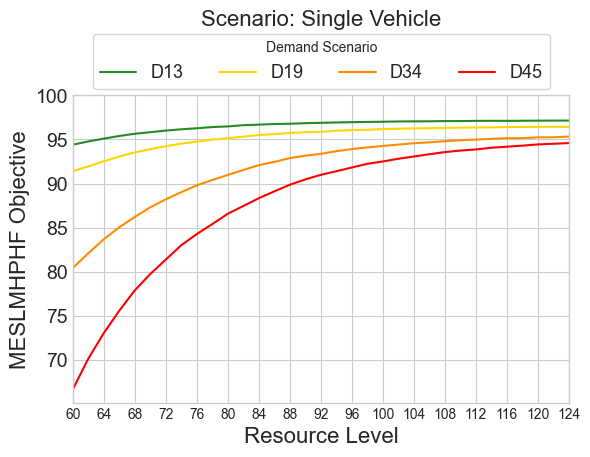

In [24]:
colours = ['forestgreen', 'gold', 'darkorange', 'red']
fig, ax = plt.subplots(1)
for demand_level, colour in zip([13, 19, 34, 45], colours):
    x = np.arange(60, 125, 2)
    y = objective_values['single'][demand_level]
    ys = np.array(y)[~np.isnan(y)]
    xs = x[~np.isnan(y)]
    ax.plot(xs, ys, color=colour, label=f"D{demand_level}")
ax.set_ylim(top=100)
ax.set_ylabel('MESLMHPHF Objective', fontsize=16)
ax.set_xlabel('Resource Level', fontsize=16)
ax.set_xlim(60, 124)
ax.set_xticks(range(60, 125, 4))
ax.tick_params(axis='y', which='major', labelsize=14)
ax.set_title('Scenario: Single Vehicle', fontsize=16, y=1.2)
ax.legend(ncol=4, frameon=True, fontsize=13, title="Demand Scenario", bbox_to_anchor=(0.98, 1.23))
plt.subplots_adjust(top=0.75)
fig.savefig('../tex/img/plots/single_Objective.pdf')

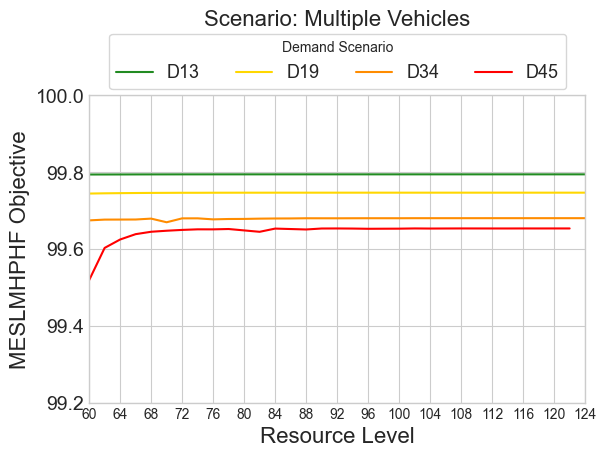

In [25]:
colours = ['forestgreen', 'gold', 'darkorange', 'red']
fig, ax = plt.subplots(1)
for demand_level, colour in zip([13, 19, 34, 45], colours):
    x = np.arange(60, 125, 2)
    y = objective_values['multiple'][demand_level]
    ys = np.array(y)[~np.isnan(y)]
    xs = x[~np.isnan(y)]
    ax.plot(xs, ys, color=colour, label=f"D{demand_level}")
ax.set_ylim(99.2, 100)
ax.set_ylabel('MESLMHPHF Objective', fontsize=16)
ax.set_xlabel('Resource Level', fontsize=16)
ax.set_xlim(60, 124)
ax.set_xticks(range(60, 125, 4))
ax.tick_params(axis='y', which='major', labelsize=14)
ax.set_title('Scenario: Multiple Vehicles', fontsize=16, y=1.2)
ax.legend(ncol=4, frameon=True, fontsize=13, title="Demand Scenario", bbox_to_anchor=(0.98, 1.23))
plt.subplots_adjust(top=0.75)
fig.savefig('../tex/img/plots/multiple_Objective.pdf')

# Plot A1 Survival

In [26]:
max_a1_values = {
    13: get_A1(np.array([200 for _ in range(67)]), np.array([200 for _ in range(67)]), demand_rates_13),
    19: get_A1(np.array([200 for _ in range(67)]), np.array([200 for _ in range(67)]), demand_rates_19),
    34: get_A1(np.array([200 for _ in range(67)]), np.array([200 for _ in range(67)]), demand_rates_34),
    45: get_A1(np.array([200 for _ in range(67)]), np.array([200 for _ in range(67)]), demand_rates_45),
}

In [27]:
a1_survivals = {
    'multiple': {13: [], 19: [], 34: [], 45: []},
    'single': {13: [], 19: [], 34: [], 45: []}
}
for scenario in ['multiple', 'single']:
    for demand in [13, 19, 34, 45]:
        for resource_level in tqdm.tqdm_notebook(range(60, 125, 2)):
            primary = np.genfromtxt(f'../../ambulance_simulation/src/data/posts/original/allocations/demand_{demand}_{scenario}_{resource_level}.csv')
            secondary = np.genfromtxt(f'../../ambulance_simulation/src/data/posts/original/allocations_secondary/demand_{demand}_{scenario}_{resource_level}.csv')
            g = get_A1(primary, secondary, demand_rates[demand])
            if g >= 0 and g <= 100:
                a1_survivals[scenario][demand].append(g)
            else:
                a1_survivals[scenario][demand].append(np.nan)

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

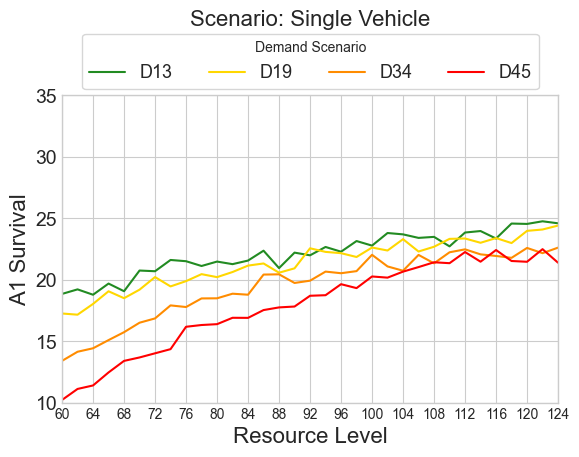

In [28]:
colours = ['forestgreen', 'gold', 'darkorange', 'red']
fig, ax = plt.subplots(1)
for demand_level, colour in zip([13, 19, 34, 45], colours):
    x = np.arange(60, 125, 2)
    y = a1_survivals['single'][demand_level]
    ys = np.array(y)[~np.isnan(y)]
    xs = x[~np.isnan(y)]
    ax.plot(xs, ys, color=colour, label=f"D{demand_level}")
ax.set_ylim(10, 35)
ax.set_ylabel('A1 Survival', fontsize=16)
ax.set_xlabel('Resource Level', fontsize=16)
ax.set_xlim(60, 124)
ax.set_xticks(range(60, 125, 4))
ax.tick_params(axis='y', which='major', labelsize=14)
ax.set_title('Scenario: Single Vehicle', fontsize=16, y=1.2)
ax.legend(ncol=4, frameon=True, fontsize=13, title="Demand Scenario", bbox_to_anchor=(0.98, 1.23))
plt.subplots_adjust(top=0.75)
fig.savefig('../tex/img/plots/single_A1Survival.pdf')

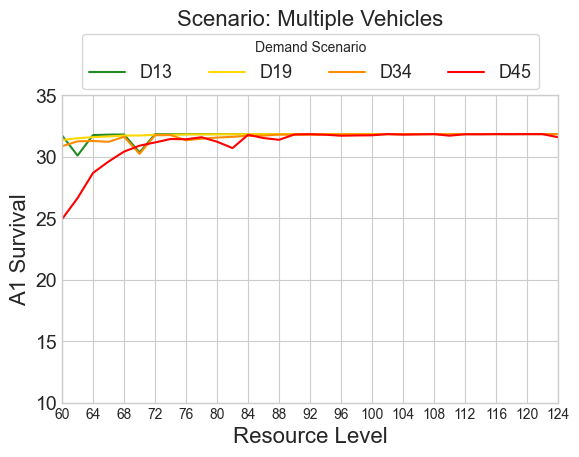

In [29]:
colours = ['forestgreen', 'gold', 'darkorange', 'red']
fig, ax = plt.subplots(1)
for demand_level, colour in zip([13, 19, 34, 45], colours):
    x = np.arange(60, 125, 2)
    y = a1_survivals['multiple'][demand_level]
    ys = np.array(y)[~np.isnan(y)]
    xs = x[~np.isnan(y)]
    ax.plot(xs, ys, color=colour, label=f"D{demand_level}")
ax.set_ylim(10, 35)
ax.set_ylabel('A1 Survival', fontsize=16)
ax.set_xlabel('Resource Level', fontsize=16)
ax.set_xlim(60, 124)
ax.set_xticks(range(60, 125, 4))
ax.tick_params(axis='y', which='major', labelsize=14)
ax.set_title('Scenario: Multiple Vehicles', fontsize=16, y=1.2)
ax.legend(ncol=4, frameon=True, fontsize=13, title="Demand Scenario", bbox_to_anchor=(0.98, 1.23))
plt.subplots_adjust(top=0.75)
fig.savefig('../tex/img/plots/multiple_A1Survival.pdf')

In [30]:
def get_obj_3k(allocation_primary, allocation_secondary, demand_rates):
    g = objective.get_objective(
        demand_rates=demand_rates,
        primary_survivals=primary_survivals_3k,
        secondary_survivals=secondary_survivals_3k,
        weights_single_vehicle=weights_single_vehicle,
        weights_multiple_vehicles=weights_multiple_vehicles,
        beta=beta_3k,
        R=R_3k,
        vehicle_station_utilisation_function=utilisation.solve_utilisations,
        allocation_primary=allocation_primary,
        allocation_secondary=allocation_secondary,
        service_rate_primary=service_rate_primary,
        service_rate_secondary=service_rate_secondary,
    )
    return (g / demand_rates.sum()) * 100

In [31]:
def get_obj_5k(allocation_primary, allocation_secondary, demand_rates):
    g = objective.get_objective(
        demand_rates=demand_rates,
        primary_survivals=primary_survivals_5k,
        secondary_survivals=secondary_survivals_5k,
        weights_single_vehicle=weights_single_vehicle,
        weights_multiple_vehicles=weights_multiple_vehicles,
        beta=beta_5k,
        R=R_5k,
        vehicle_station_utilisation_function=utilisation.solve_utilisations,
        allocation_primary=allocation_primary,
        allocation_secondary=allocation_secondary,
        service_rate_primary=service_rate_primary,
        service_rate_secondary=service_rate_secondary,
    )
    return (g / demand_rates.sum()) * 100

In [32]:
def get_A1_3k(allocation_primary, allocation_secondary, demand_rates):
    g = objective.get_survival_A1_only(
        demand_rates=demand_rates,
        primary_survivals=primary_survivals_3k,
        secondary_survivals=secondary_survivals_3k,
        weights_single_vehicle=weights_single_vehicle,
        weights_multiple_vehicles=weights_multiple_vehicles,
        beta=beta_3k,
        R=R_3k,
        vehicle_station_utilisation_function=utilisation.solve_utilisations,
        allocation_primary=allocation_primary,
        allocation_secondary=allocation_secondary,
        service_rate_primary=service_rate_primary,
        service_rate_secondary=service_rate_secondary,
    )
    return (g / demand_rates[0].sum()) * 100

In [33]:
def get_A1_5k(allocation_primary, allocation_secondary, demand_rates):
    g = objective.get_survival_A1_only(
        demand_rates=demand_rates,
        primary_survivals=primary_survivals_5k,
        secondary_survivals=secondary_survivals_5k,
        weights_single_vehicle=weights_single_vehicle,
        weights_multiple_vehicles=weights_multiple_vehicles,
        beta=beta_5k,
        R=R_5k,
        vehicle_station_utilisation_function=utilisation.solve_utilisations,
        allocation_primary=allocation_primary,
        allocation_secondary=allocation_secondary,
        service_rate_primary=service_rate_primary,
        service_rate_secondary=service_rate_secondary,
    )
    return (g / demand_rates[0].sum()) * 100

In [34]:
primary_3k = np.int64(np.genfromtxt('../../ambulance_simulation/src/data/posts/grid_3km/allocations/grid_3km.csv'))
secondary_3k = np.int64(np.genfromtxt('../../ambulance_simulation/src/data/posts/grid_3km/allocations_secondary/grid_3km.csv'))

primary_5k = np.int64(np.genfromtxt('../../ambulance_simulation/src/data/posts/grid_5km/allocations/grid_5km.csv'))
secondary_5k = np.int64(np.genfromtxt('../../ambulance_simulation/src/data/posts/grid_5km/allocations_secondary/grid_5km.csv'))

In [35]:
get_obj_3k(primary_3k, secondary_3k, demand_rates_13)

87.9483137472991

In [36]:
get_obj_5k(primary_5k, secondary_5k, demand_rates_13)

85.63996059421824

In [37]:
get_A1_3k(primary_3k, secondary_3k, demand_rates_13)

13.642466035116808

In [38]:
get_A1_5k(primary_5k, secondary_5k, demand_rates_13)

12.226565332560606